<a href="https://colab.research.google.com/github/Sujith-data/Bank-Customer-Churn-Analysis/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Bank Customer Churn Prediction Using Machine Learning</h1>**

**<h2>About the Dataset</h2>**

This dataset contains 10,000 records, each of it corresponds to a different bank's user. The target is Exited, a binary variable that describes whether the user decided to leave the bank. In the dataset, there are customer identifiers, four columns describing personal information about the customer (surname, location, gender and age), and some other columns containing information related to the loan (such as credit score, current balance in the user's account and whether they are an active member among others).



Being proactive, detecting in advance if a customer is planning to leave, and reacting in time to convince them to stay can result in a more satisfied customer base. Also, it can help understand your customers and why they like or dislike your business. This dataset can help a banking institution reduce churn and offer more tailored products to their customers.

**<h2>Importing Libraries</h2>**

**<h2>Reading and Exploring the dataset</h2>**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the dataset
bank_data = pd.read_csv("/content/Churn_Modelling.csv")

# Printing the first 5 rows
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Printing the last 5 rows
bank_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# Shape of the dataframe
bank_data.shape

(10000, 14)

In [ ]:
# Datatype of each variable in the DataFrame
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**<h2>Statistics Summary</h2>**

In [ ]:
# Statistics Summary
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Printing the column names
bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Renaming the Exited column as Churned
bank_data.rename(columns={'Exited': 'Churned', 'Geography': 'Location'}, inplace=True)

In [ ]:
# Checking for renamed columns
bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Location',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churned'],
      dtype='object')

**<h4>Printing unique values in the columns**



In [ ]:
# Unique values in Number of Products
print(bank_data["NumOfProducts"].unique())

[1 3 2 4]


In [ ]:
# Unique values in Location
print(bank_data["Location"].unique())

['France' 'Spain' 'Germany']


In [ ]:
# Unique values in HasCrCard
print(bank_data["HasCrCard"].unique())

[1 0]


In [ ]:
# Unique values in IsActiveMember
print(bank_data["IsActiveMember"].unique())

[1 0]


In [ ]:
# Unique values in Churned
print(bank_data["Churned"].unique())

[1 0]


**<h1>EDA - Exploratory Data Analysis</h1>**

**<h4>Checking for Missing Values**



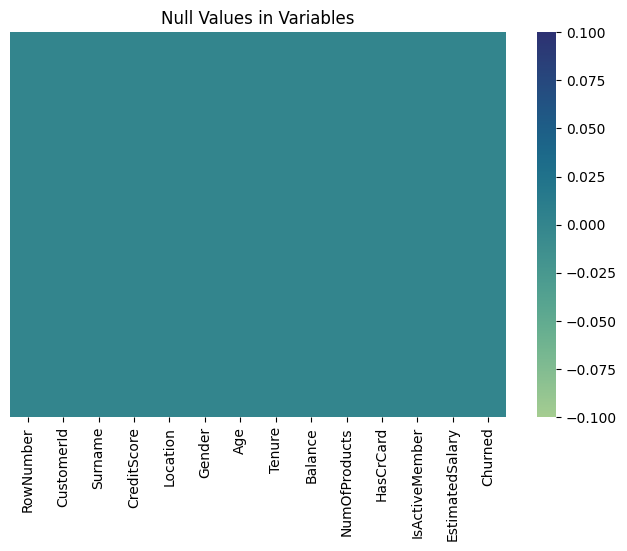

In [ ]:
# Missing values detection using seaborn

plt.figure(figsize = (8,5))
plt.title('Null Values in Variables')
sns.heatmap(bank_data.isnull(), yticklabels = False, cmap = 'crest')
plt.show()

In [ ]:
# Missing values detection using isnull().sum() method
bank_data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Location,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Churned Customers
avg_salary = bank_data[bank_data["Churned"]==1]["EstimatedSalary"].mean()
avg_balance = bank_data[bank_data["Churned"]==1]["Balance"].mean()
avg_creditscore = bank_data[bank_data["Churned"]==1]["CreditScore"].mean()
avg_tenure = bank_data[bank_data["Churned"]==1]["Tenure"].mean()
avg_age = bank_data[bank_data["Churned"]==1]["Age"].mean()
avg_female = bank_data[(bank_data["Churned"]==1) & (bank_data["Gender"]=="Female")]["Age"].mean()


print("Average Salary of Churned Customer: ",avg_salary)
print("Average Balance of Churned Customer: ",avg_balance)
print("Average Credit Score of Churned Customer: ",avg_creditscore)
print("Average Tenure of Churned Customer: ",avg_tenure)
print("Average Age of Churned Customer: ",avg_age)

Average Salary of Churned Customer:  101465.67753068237
Average Balance of Churned Customer:  91108.53933726068
Average Credit Score of Churned Customer:  645.3514972999509
Average Tenure of Churned Customer:  4.932744231713304
Average Age of Churned Customer:  44.8379970544919


In [ ]:
# Non-Churned Customers
avg_salary = bank_data[bank_data["Churned"]==0]["EstimatedSalary"].mean()
avg_balance = bank_data[bank_data["Churned"]==0]["Balance"].mean()
avg_creditscore = bank_data[bank_data["Churned"]==0]["CreditScore"].mean()
avg_tenure = bank_data[bank_data["Churned"]==0]["Tenure"].mean()
avg_age = bank_data[bank_data["Churned"]==0]["Age"].mean()
avg_female = bank_data[(bank_data["Churned"]==0) & (bank_data["Gender"]=="Female")]["Age"].mean()

print("Average Salary of Churned Customer: ",avg_salary)
print("Average Balance of Churned Customer: ",avg_balance)
print("Average Credit Score of Churned Customer: ",avg_creditscore)
print("Average Tenure of Churned Customer: ",avg_tenure)
print("Average Age of Churned Customer: ",avg_age)

Average Salary of Churned Customer:  99738.39177194524
Average Balance of Churned Customer:  72745.2967788522
Average Credit Score of Churned Customer:  651.8531960316463
Average Tenure of Churned Customer:  5.033278914981791
Average Age of Churned Customer:  37.40838879819164


**Location Analysis**

In [ ]:
#France
df_france = bank_data[bank_data["Location"]=="France"]
df_france.shape

(5014, 14)

In [ ]:
#Churned Customers in France

avg_salary = round(df_france[df_france["Churned"]==1]["EstimatedSalary"].mean(),2)
avg_balance = round(df_france[df_france["Churned"]==1]["Balance"].mean(),2)
avg_creditscore = round(df_france[df_france["Churned"]==1]["CreditScore"].mean(),2)
avg_tenure = round(df_france[df_france["Churned"]==1]["Tenure"].mean(),2)
avg_age = round(df_france[df_france["Churned"]==1]["Age"].mean())

print("Average Salary of Churned Customer: ",avg_salary)
print("Average Balance of Churned Customer: ",avg_balance)
print("Average Credit Score of Churned Customer: ",avg_creditscore)
print("Average Tenure of Churned Customer: ",avg_tenure)
print("Average Age of Churned Customer: ",avg_age)

Average Salary of Churned Customer:  103439.28
Average Balance of Churned Customer:  71192.8
Average Credit Score of Churned Customer:  641.91
Average Tenure of Churned Customer:  5.0
Average Age of Churned Customer:  45


In [ ]:
# Non-Churned Customers Customers in France
avg_salary = round(df_france[df_france["Churned"]==0]["EstimatedSalary"].mean(),2)
avg_balance = round(df_france[df_france["Churned"]==0]["Balance"].mean(),2)
avg_creditscore = round(df_france[df_france["Churned"]==0]["CreditScore"].mean(),2)
avg_tenure = round(df_france[df_france["Churned"]==0]["Tenure"].mean(),1)
avg_age = round(df_france[df_france["Churned"]==1]["Age"].mean())

print("Average Salary of Non-Churned Customer: ",avg_salary)
print("Average Balance of Non-Churned Customer: ",avg_balance)
print("Average Credit Score of Non-Churned Customer: ",avg_creditscore)
print("Average Tenure of Non-Churned Customer: ",avg_tenure)
print("Average Age of Non-Churned Customer: ",avg_age)

Average Salary of Non-Churned Customer:  99217.1
Average Balance of Non-Churned Customer:  60339.28
Average Credit Score of Non-Churned Customer:  651.16
Average Tenure of Non-Churned Customer:  5.0
Average Age of Non-Churned Customer:  45


In [ ]:
#Germany
df_germany = bank_data[bank_data["Location"]=="Germany"]
df_germany.shape

(2509, 14)

In [ ]:
#Churned Customers in Germany
avg_salary = df_germany[df_germany["Churned"]==1]["EstimatedSalary"].mean()
avg_balance = df_germany[df_germany["Churned"]==1]["Balance"].mean()
avg_creditscore = df_germany[df_germany["Churned"]==1]["CreditScore"].mean()
avg_tenure = df_germany[df_germany["Churned"]==1]["Tenure"].mean()
avg_age = df_germany[df_germany["Churned"]==1]["Age"].mean()

print("Average Salary of Churned Customer: ",avg_salary)
print("Average Balance of Churned Customer: ",avg_balance)
print("Average Credit Score of Churned Customer: ",avg_creditscore)
print("Average Tenure of Churned Customer: ",avg_tenure)
print("Average Age of Churned Customer: ",avg_age)

Average Salary of Churned Customer:  98403.88644963143
Average Balance of Churned Customer:  120361.0755896806
Average Credit Score of Churned Customer:  647.6891891891892
Average Tenure of Churned Customer:  5.006142506142506
Average Age of Churned Customer:  44.894348894348894


In [ ]:
# Non-Churned Customers Customers in Germany
avg_salary = df_germany[df_germany["Churned"]==0]["EstimatedSalary"].mean()
avg_balance = df_germany[df_germany["Churned"]==0]["Balance"].mean()
avg_creditscore = df_germany[df_germany["Churned"]==0]["CreditScore"].mean()
avg_tenure = df_germany[df_germany["Churned"]==0]["Tenure"].mean()
avg_age = df_germany[df_germany["Churned"]==0]["Age"].mean()

print("Average Salary of Non-Churned Customer: ",avg_salary)
print("Average Balance of Non-Churned Customer: ",avg_balance)
print("Average Credit Score of Non-Churned Customer: ",avg_creditscore)
print("Average Tenure of Non-Churned Customer: ",avg_tenure)
print("Average Age of Non-Churned Customer: ",avg_age)

Average Salary of Non-Churned Customer:  102414.65787610621
Average Balance of Non-Churned Customer:  119427.10669616518
Average Credit Score of Non-Churned Customer:  653.2613569321534
Average Tenure of Non-Churned Customer:  5.011799410029498
Average Age of Non-Churned Customer:  37.31150442477876


In [ ]:
#Spain
df_spain = bank_data[bank_data["Location"]=="Spain"]
df_spain.shape

(2477, 14)

In [ ]:
#Churned Customers in Spain
avg_salary = df_spain[df_spain["Churned"]==1]["EstimatedSalary"].mean()
avg_balance = df_spain[df_spain["Churned"]==1]["Balance"].mean()
avg_creditscore = df_spain[df_spain["Churned"]==1]["CreditScore"].mean()
avg_tenure = df_spain[df_spain["Churned"]==1]["Tenure"].mean()
avg_age = df_spain[df_spain["Churned"]==1]["Age"].mean()

print("Average Salary of Churned Customer: ",avg_salary)
print("Average Balance of Churned Customer: ",avg_balance)
print("Average Credit Score of Churned Customer: ",avg_creditscore)
print("Average Tenure of Churned Customer: ",avg_tenure)
print("Average Age of Churned Customer: ",avg_age)

Average Salary of Churned Customer:  103629.55481840194
Average Balance of Churned Customer:  72513.35244552059
Average Credit Score of Churned Customer:  647.4842615012107
Average Tenure of Churned Customer:  4.656174334140436
Average Age of Churned Customer:  44.14769975786925


In [ ]:
# Non-Churned Customers in Germany
avg_salary = df_spain[df_spain["Churned"]==0]["EstimatedSalary"].mean()
avg_balance = df_spain[df_spain["Churned"]==0]["Balance"].mean()
avg_creditscore = df_spain[df_spain["Churned"]==0]["CreditScore"].mean()
avg_tenure = df_spain[df_spain["Churned"]==0]["Tenure"].mean()
avg_age = df_spain[df_spain["Churned"]==0]["Age"].mean()

print("Average Salary of Non-Churned Customer: ",avg_salary)
print("Average Balance of Non-Churned Customer: ",avg_balance)
print("Average Credit Score of Non-Churned Customer: ",avg_creditscore)
print("Average Tenure of Non-Churned Customer: ",avg_tenure)
print("Average Age of Non-Churned Customer: ",avg_age)

Average Salary of Non-Churned Customer:  98602.36986434109
Average Balance of Non-Churned Customer:  59678.07046996124
Average Credit Score of Non-Churned Customer:  652.1041666666666
Average Tenure of Non-Churned Customer:  5.107558139534884
Average Age of Non-Churned Customer:  37.83914728682171


**<h4>Data Visualization**

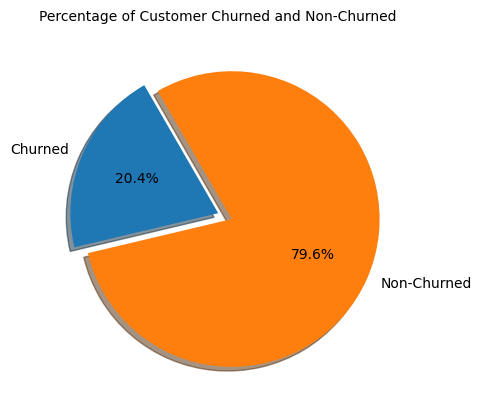

In [ ]:
# Percentage of Customer Churned and Non-Churned using Pie chart
labels = 'Churned', 'Non-Churned'
sizes = [bank_data.Churned[bank_data['Churned']==1].count(), bank_data.Churned[bank_data['Churned']==0].count()]

# Explode the slice representing 'Churned'
explode = (0, 0.1)

# Create the pie chart
plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
plt.title("Percentage of Customer Churned and Non-Churned", size = 10)

# Show the pie chart
plt.show()

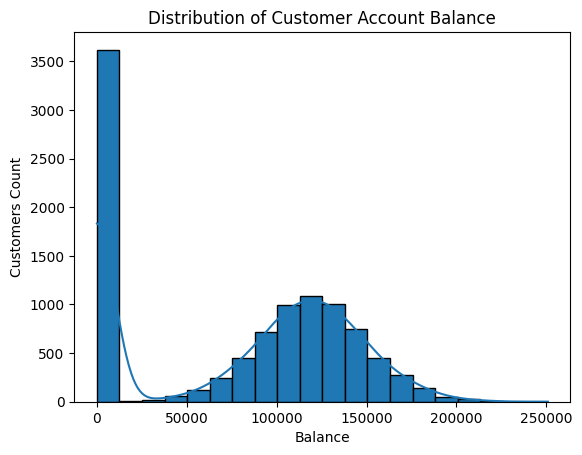

In [ ]:
# Plot the histplot
sns.histplot(bank_data["Balance"], bins = 20, kde= True, alpha=1.0)

# Add labels and title
plt.title("Distribution of Customer Account Balance")
plt.ylabel("Customers Count")

# Show the plot
plt.show()

In [ ]:
bank_data[bank_data["Balance"]==-0].shape

(3617, 14)

**Insights**

1. **Peak at Zero Balance**: There is a significant peak at the zero balance mark, 37.16% of the customers have no funds in their accounts.

2. Many customers have low or no balance, there are relatively fewer customers with higher balances.

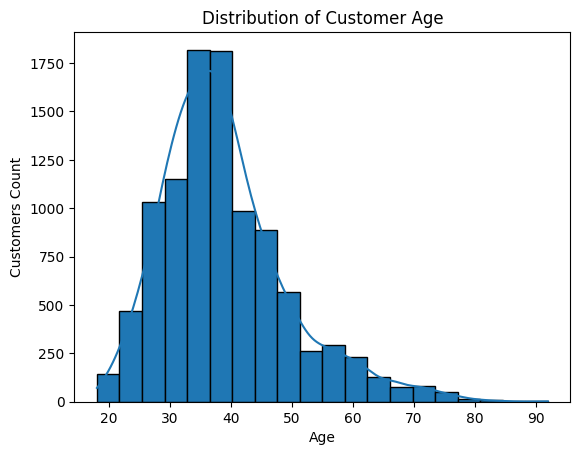

In [ ]:
# Plot the histplot
sns.histplot(bank_data["Age"], bins = 20, kde= True, alpha=1.0)

# Add labels and title
plt.title("Distribution of Customer Age")
plt.ylabel("Customers Count")

# Show the plot
plt.show()

**Insights**

**Age Distribution of Customers** : 59.87% of the customers fall between their late 20s and early 40s. Beyond this range, there's a gradual decline in the number of customers as age increases.

In [ ]:
bank_data[bank_data["Age"]<40].shape

(5987, 14)

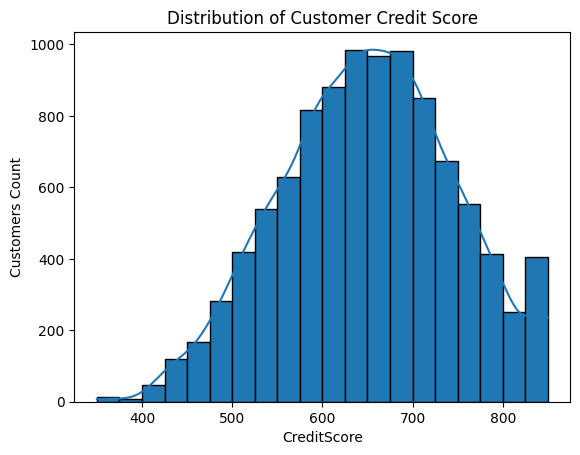

In [ ]:
# Plot the histplot
sns.histplot(bank_data["CreditScore"], bins = 20, kde= True, alpha=1.0)

# Add labels and title
plt.title("Distribution of Customer Credit Score")
plt.ylabel("Customers Count")

# Show the plot
plt.show()

In [ ]:
bank_data[(bank_data["CreditScore"]>=600) & (bank_data["CreditScore"]<=700)].shape

(3850, 14)

**Insights**

Around 38.50% of customers have a good credit score(600-700).

**<h1>Churned Customer Analysis</h1>**

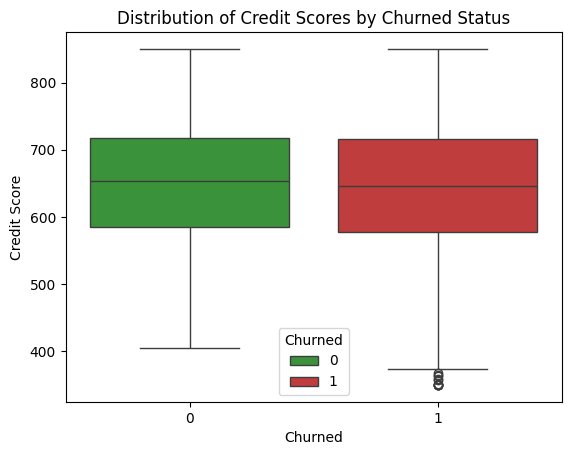

In [ ]:
# Define custom colors
custom_palette = ["#2ca02c", "#d62728"]

# Create the boxplot
sns.boxplot(x="Churned", y="CreditScore", data=bank_data, hue = "Churned", palette = custom_palette)

# Add labels and title
plt.xlabel("Churned")
plt.ylabel("Credit Score")
plt.title("Distribution of Credit Scores by Churned Status")

# Show the plot
plt.show()

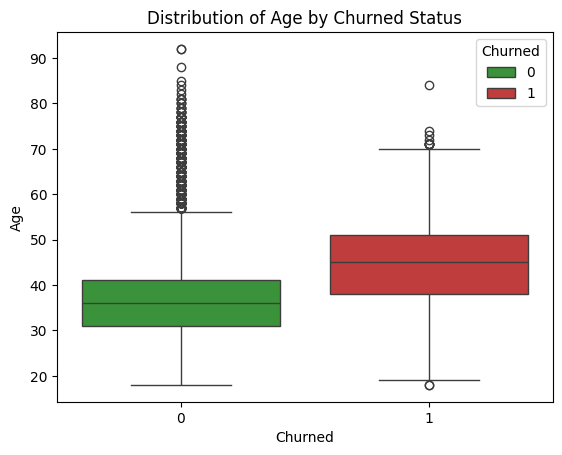

In [ ]:
# Define custom colors
custom_palette = ["#2ca02c", "#d62728"]

# Create the boxplot
sns.boxplot(x="Churned", y="Age", data=bank_data, hue = "Churned", palette = custom_palette)

# Add labels and title
plt.xlabel("Churned")
plt.ylabel("Age")
plt.title("Distribution of Age by Churned Status")

# Show the plot
plt.show()

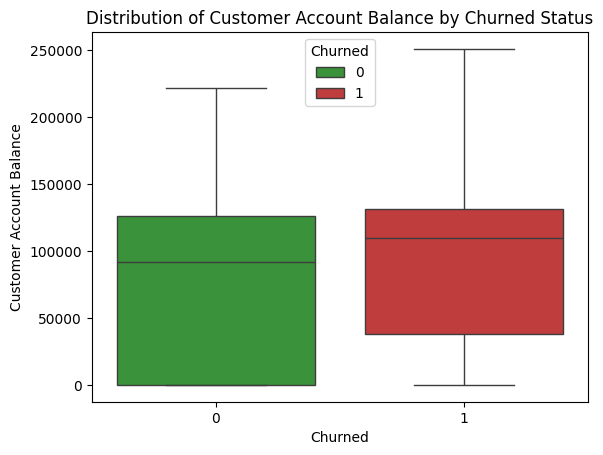

In [ ]:
# Define custom colors
custom_palette = ["#2ca02c", "#d62728"]

# Create the boxplot
sns.boxplot(x="Churned", y="Balance", data=bank_data, hue = "Churned", palette = custom_palette)

# Add labels and title
plt.xlabel("Churned")
plt.ylabel("Customer Account Balance")
plt.title("Distribution of Customer Account Balance by Churned Status")

# Show the plot
plt.show()

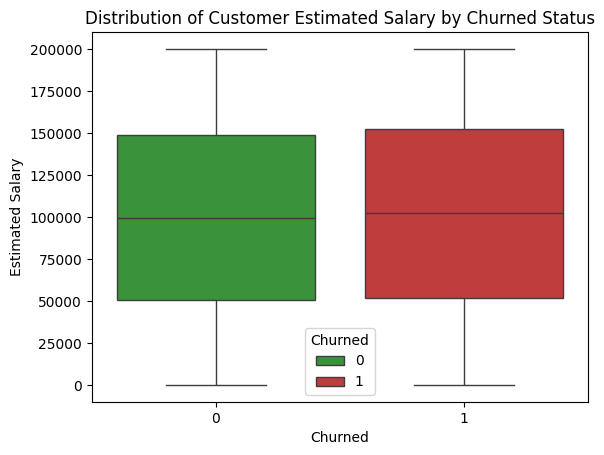

In [ ]:
# Define custom colors
custom_palette = ["#2ca02c", "#d62728"]

# Create the boxplot
sns.boxplot(x="Churned", y="EstimatedSalary", data=bank_data, hue = "Churned", palette = custom_palette)

# Add labels and title
plt.xlabel("Churned")
plt.ylabel("Estimated Salary")
plt.title("Distribution of Customer Estimated Salary by Churned Status")

# Show the plot
plt.show()

In [ ]:
# Churned Customers by Number of Products
df_NumOfProducts = bank_data.groupby('NumOfProducts')['Churned'].value_counts().unstack()
df_NumOfProducts

Churned,0,1
NumOfProducts,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,NaN,60.0


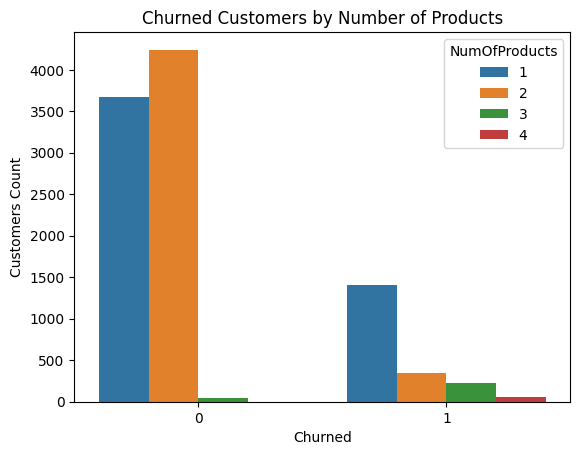

In [ ]:
# Define custom colors
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Plot the countplot
sns.countplot(x='Churned', hue='NumOfProducts', data=bank_data, palette = custom_palette)

# Add labels and title
plt.xlabel('Churned')
plt.ylabel("Customers Count")
plt.title('Churned Customers by Number of Products')

# Show the plot
plt.show()

**Insights**

1. Customers who had a total of four products left the bank.

2. Customers with just one product were comparatively more likely to churn.

In [ ]:
# Count of Customers who had a total of four products left the bank from Spain
bank_data[(bank_data["NumOfProducts"]==4) & (bank_data["Churned"]==1) & (bank_data["Location"]=="Spain")].shape

(7, 14)

In [ ]:
# Count of Customers who had a total of four products left the bank from France
bank_data[(bank_data["NumOfProducts"]==4) & (bank_data["Churned"]==1) & (bank_data["Location"]=="France")].shape

(29, 14)

In [ ]:
# Count of Customers who had a total of four products left the bank from Germany
bank_data[(bank_data["NumOfProducts"]==4) & (bank_data["Churned"]==1) & (bank_data["Location"]=="Germany")].shape

(24, 14)

In [ ]:
# Churned Customers by Location
df_Location = bank_data.groupby('Location')['Churned'].value_counts().unstack()
df_Location

Churned,0,1
Location,,
France,4204,810
Germany,1695,814
Spain,2064,413


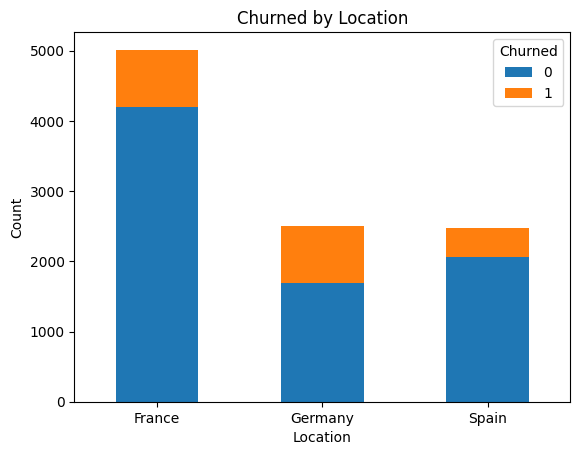

In [ ]:
df_Location.plot(kind='bar', stacked=True)

# Add labels and title
plt.title("Churned by Location")
plt.xlabel("Location")
plt.ylabel("Count")

# Rotate x-axis labels to be straight
plt.xticks(rotation=0)

# Show the plot
plt.show()

**<h1>Feature Engineering</h1>**

**<h4>Categorizing Numeric Variables**

In [ ]:
bank_data_categories = bank_data.copy()

In [ ]:
#Categorizing Customer Balance Column

# Define the bin edges
bin_edges = [-1, 0, 50000, 100000, 150000,200000, 251000]

# Define the labels for the bins
bin_labels = ['Zero Balance', 'Very Low Balance', 'Low Balance', 'Medium Balance', 'High Balance', 'Very High Balance']

# Create a new column with the categorized balance
bank_data_categories['Balance_Category'] = pd.cut(bank_data_categories['Balance'], bins=bin_edges, labels=bin_labels)

# Display the first few rows to verify the changes
print(bank_data_categories[['Balance', 'Balance_Category']].head())

     Balance Balance_Category
0       0.00     Zero Balance
1   83807.86      Low Balance
2  159660.80     High Balance
3       0.00     Zero Balance
4  125510.82   Medium Balance


In [ ]:
#Categorizing Customer Age Column

# Define the bin edges
bin_edges = [17, 20, 35, 50, 93]  # Adjust these as needed

# Define the labels for the bins
bin_labels = ['Teenager', 'Youngster', 'Elder', 'Older']

# Create a new column with the categorized age
bank_data_categories['Age_Category'] = pd.cut(bank_data_categories['Age'], bins=bin_edges, labels=bin_labels)

# Display the first few rows to verify the changes
print(bank_data_categories[['Age', 'Age_Category']].head())

   Age Age_Category
0   42        Elder
1   41        Elder
2   42        Elder
3   39        Elder
4   43        Elder


In [ ]:
#Categorizing Customer Estimated Salary Column

# Define the bin edges
bin_edges = [10000, 50000, 100000, 150000, 200000]

# Define the labels for the bins
bin_labels = ['Low Salary', 'Medium Salary', 'High Salary','Very High Salary']

# Create a new column with the categorized balance
bank_data_categories['EstimatedSalary_Category'] = pd.cut(bank_data_categories['EstimatedSalary'], bins=bin_edges, labels=bin_labels)

# Display the first few rows to verify the changes
print(bank_data_categories[['EstimatedSalary', 'EstimatedSalary_Category']].head())

   EstimatedSalary EstimatedSalary_Category
0        101348.88              High Salary
1        112542.58              High Salary
2        113931.57              High Salary
3         93826.63            Medium Salary
4         79084.10            Medium Salary


In [ ]:
#Categorizing Customer Credit Score Column

# Define the bin edges
bin_edges = [300, 579, 669, 739, 799 ,851]

# Define the labels for the bins
bin_labels = ['Poor', 'Fair', 'Good', 'Very Good','Excellent']

# Create a new column with the categorized balance
bank_data_categories['CreditScore_Category'] = pd.cut(bank_data_categories['CreditScore'], bins=bin_edges, labels=bin_labels)

# Display the first few rows to verify the changes
print(bank_data_categories[['CreditScore', 'CreditScore_Category']].head())

   CreditScore CreditScore_Category
0          619                 Fair
1          608                 Fair
2          502                 Poor
3          699                 Good
4          850            Excellent


In [ ]:
#Categorizing Customer Tenure Column

# Define the bin edges
bin_edges = [0, 2, 4, 6, 8, 10]

# Define the labels for the bins
bin_labels = ['0-2 years', '2-4 years', '4-6 years', '6-8 years', '8-10 years']

# Create a new column with the categorized tenure
bank_data_categories['Tenure_Category'] = pd.cut(bank_data_categories['Tenure'], bins=bin_edges, labels=bin_labels)

# Display the first few rows to verify the changes
print(bank_data_categories[['Tenure', 'Tenure_Category']].head())

   Tenure Tenure_Category
0       2       0-2 years
1       1       0-2 years
2       8       6-8 years
3       1       0-2 years
4       2       0-2 years


In [ ]:
# Define the bin edges
bin_edges = [-0.5, 0.5, 1.5]  # Edge at 0.5 to differentiate between 0 and 1

# Define the labels for the bins
bin_labels = ['No', 'Yes']

# Create a new column with the categorized credit card status
bank_data_categories['HasCrCard_Category'] = pd.cut(bank_data_categories['HasCrCard'], bins=bin_edges, labels=bin_labels)

# Display the first few rows to verify the changes
print(bank_data_categories[['HasCrCard', 'HasCrCard_Category']].head())

   HasCrCard HasCrCard_Category
0          1                Yes
1          0                 No
2          1                Yes
3          0                 No
4          1                Yes


In [ ]:
# Define the bin edges
bin_edges = [-0.5, 0.5, 1.5]  # Edge at 0.5 to differentiate between 0 and 1

# Define the labels for the bins
bin_labels = ['No', 'Yes']

# Create a new column with the categorized credit card status
bank_data_categories['IsActiveMember_Category'] = pd.cut(bank_data_categories['IsActiveMember'], bins=bin_edges, labels=bin_labels)

# Display the first few rows to verify the changes
print(bank_data_categories[['IsActiveMember', 'IsActiveMember_Category']].head())

   IsActiveMember IsActiveMember_Category
0               1                     Yes
1               1                     Yes
2               0                      No
3               0                      No
4               1                     Yes


In [ ]:
bank_data.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [ ]:
bank_data_categories.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Churned,Balance_Category,Age_Category,EstimatedSalary_Category,CreditScore_Category,Tenure_Category,HasCrCard_Category,IsActiveMember_Category
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,...,1,101348.88,1,Zero Balance,Elder,High Salary,Fair,0-2 years,Yes,Yes


In [ ]:
# Filter the DataFrame to include only churned customers
churned_customers = bank_data_categories[bank_data_categories['Churned'] == 1]

# Group by CreditScore_Category and calculate the mean of EstimatedSalary
avg_est_salary_churned = churned_customers.groupby("CreditScore_Category")["EstimatedSalary"].mean()

print(avg_est_salary_churned)

CreditScore_Category
Poor         105802.361538
Fair         100576.197051
Good         101916.870509
Very Good     98471.039444
Excellent     92910.427656
Name: EstimatedSalary, dtype: float64


<ipython-input-63-2b778e9d124b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_est_salary_churned = churned_customers.groupby("CreditScore_Category")["EstimatedSalary"].mean()


In [ ]:
# Filter the DataFrame to include only churned customers
churned_customers = bank_data_categories[bank_data_categories['Churned'] == 0]

# Group by CreditScore_Category and calculate the mean of EstimatedSalary
avg_est_salary_churned = churned_customers.groupby("CreditScore_Category")["EstimatedSalary"].mean()

print(avg_est_salary_churned)

CreditScore_Category
Poor          99279.289821
Fair          99103.714452
Good         100204.823826
Very Good    100084.222078
Excellent    102142.955693
Name: EstimatedSalary, dtype: float64


<ipython-input-64-8e47f1d5d3ef>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_est_salary_churned = churned_customers.groupby("CreditScore_Category")["EstimatedSalary"].mean()


In [ ]:
# Group by 'CreditScore_Category' and 'Churned', then count the churned customers within each category
churned_count_by_credit_score = bank_data_categories.groupby(["CreditScore_Category", "Churned"]).size()

print(churned_count_by_credit_score)

CreditScore_Category  Churned
Poor                  0          1842
                      1           520
Fair                  0          2646
                      1           685
Good                  0          1976
                      1           452
Very Good             0           972
                      1           252
Excellent             0           527
                      1           128
dtype: int64


<ipython-input-65-1958055b5722>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_count_by_credit_score = bank_data_categories.groupby(["CreditScore_Category", "Churned"]).size()


 **<h3>One-Hot Encoding</h3>**



In [ ]:
# Get dummy variables for multiple categorical columns
dummy_variables_Location = pd.get_dummies(bank_data_categories['Location'], prefix='Location')
dummy_variables_Gender = pd.get_dummies(bank_data_categories['Gender'], prefix='Gender')
dummy_variables_nop = pd.get_dummies(bank_data_categories['NumOfProducts'], prefix='NumOfProducts')
dummy_variables_bc = pd.get_dummies(bank_data_categories["Balance_Category"], prefix='Balance_Category')
dummy_variables_ac = pd.get_dummies(bank_data_categories['Age_Category'], prefix='Age_Category')
dummy_variables_ec = pd.get_dummies(bank_data_categories['EstimatedSalary_Category'], prefix='EstimatedSalary_Category')
dummy_variables_cc = pd.get_dummies(bank_data_categories['CreditScore_Category'], prefix='CreditScore_Category')
dummy_variables_tc = pd.get_dummies(bank_data_categories['Tenure_Category'], prefix='Tenure_Category')
dummy_variables_iac = pd.get_dummies(bank_data_categories['IsActiveMember_Category'], prefix='IsActiveMember')
dummy_variables_hcc = pd.get_dummies(bank_data_categories['HasCrCard_Category'], prefix='HasCrCard')

# Concatenate dummy variables with the original DataFrame
categorized_df = pd.concat([bank_data_categories, dummy_variables_Location, dummy_variables_Gender,dummy_variables_nop, dummy_variables_bc,dummy_variables_ac, dummy_variables_ec,dummy_variables_cc,dummy_variables_tc,dummy_variables_iac,dummy_variables_hcc], axis=1)

# Drop the original categorical columns if needed"
categorized_df.drop(['RowNumber', 'CustomerId',"Surname","Age","Tenure","Gender","Location","CreditScore","Balance","HasCrCard","IsActiveMember","NumOfProducts","EstimatedSalary","Balance_Category","Age_Category", "EstimatedSalary_Category", "CreditScore_Category","Tenure_Category","HasCrCard_Category","IsActiveMember_Category"], axis=1, inplace=True)


In [ ]:
# Replace True and False with 1 and 0
categorized_df.replace({True: 1, False: 0}, inplace=True)

# Optionally, you can convert all columns to numeric type if needed
categorized_df = categorized_df.apply(pd.to_numeric, errors='ignore')

<ipython-input-67-1d38d4a39734>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorized_df.replace({True: 1, False: 0}, inplace=True)
<ipython-input-67-1d38d4a39734>:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  categorized_df = categorized_df.apply(pd.to_numeric, errors='ignore')


In [ ]:
categorized_df

,Churned,Location_France,Location_Germany,Location_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,...,CreditScore_Category_Excellent,Tenure_Category_0-2 years,Tenure_Category_2-4 years,Tenure_Category_4-6 years,Tenure_Category_6-8 years,Tenure_Category_8-10 years,IsActiveMember_No,IsActiveMember_Yes,HasCrCard_No,HasCrCard_Yes
0,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,1,1,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
9996,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
9997,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
9998,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


**<h2>Insights<h2>**

High impact on Churn seen in **NumOfProducts_3, Age_Category_Older ,NumOfProducts_1, Location_Germany, IsActiveMember_No, NumOfProducts_4, Gender_female.**

Less impact on Churn seen in **Age_Category_Youngster, NumOfProducts_2,IsActiveMember_Yes, Balance_category_Zero Balance.**

Features like **Tenure Categories and CreditScore_Category_Good, CreditScore_Category_Fair, EstimatedSalary_High Salary** has almost no impact on Churn



In [ ]:
#label Encoding
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

bank_data["Gender"] = label_encoder.fit_transform(bank_data["Gender"])
bank_data["Location"] = label_encoder.fit_transform(bank_data["Location"])

bank_data.drop(['RowNumber','CustomerId',"Surname"], axis=1, inplace=True)

                 CreditScore  Location    Gender       Age    Tenure  \
CreditScore         1.000000  0.007888 -0.002857 -0.003965  0.000842   
Location            0.007888  1.000000  0.004719  0.022812  0.003739   
Gender             -0.002857  0.004719  1.000000 -0.027544  0.014733   
Age                -0.003965  0.022812 -0.027544  1.000000 -0.009997   
Tenure              0.000842  0.003739  0.014733 -0.009997  1.000000   
Balance             0.006268  0.069408  0.012087  0.028308 -0.012254   
NumOfProducts       0.012238  0.003972 -0.021859 -0.030680  0.013444   
HasCrCard          -0.005458 -0.008523  0.005766 -0.011721  0.022583   
IsActiveMember      0.025651  0.006724  0.022544  0.085472 -0.028362   
EstimatedSalary    -0.001384 -0.001369 -0.008112 -0.007201  0.007784   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Location         0.069408       0.003972  -0.008523        0.0067

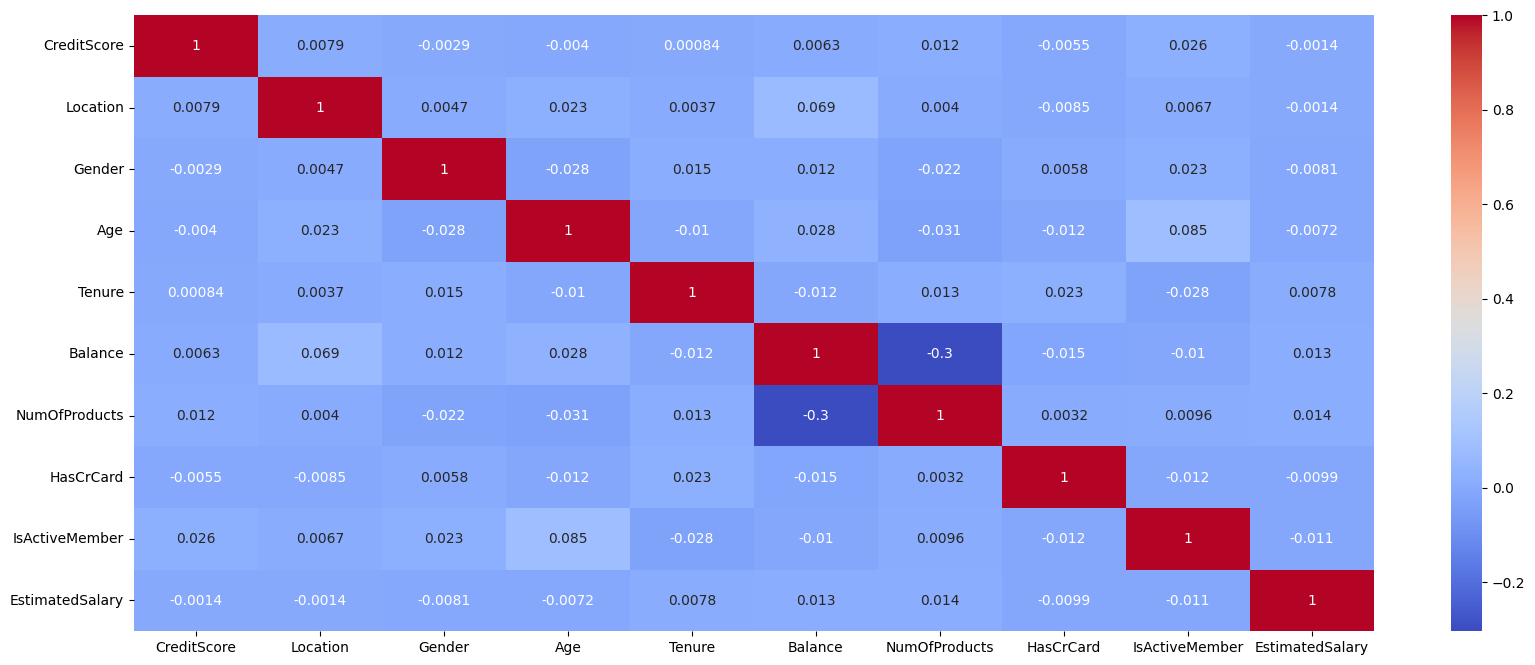

In [ ]:
all_columns = bank_data.columns

feature_columns = [col for col in all_columns if col != "Churned"]

feature_data = bank_data[feature_columns]

# Create a figure with a specific size
plt.figure(figsize=(20, 8))

# Compute the correlation matrix
corr_matrix = feature_data.corr()
# Print the correlation matrix
print(corr_matrix)
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

In [ ]:
bank_data.head()

,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bank_data.head()

,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**<h2>Model Building Using Machine Learning<h2>**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separate the predictor and target Variable
X = bank_data.drop('Churned', axis=1)
y = bank_data.Churned

# Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42,stratify=y)

# Scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

# Print the value counts of the resampled target variable
print("Value counts of the target variable (before SMOTE):")
print("Churned customers (1):", sum(y == 1))
print("Non-churned customers (0):", sum(y == 0))

Value counts of the target variable (before SMOTE):
Churned customers (1): 2037
Non-churned customers (0): 7963


In [ ]:
# Logistic Regression model without tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fitting the model
model.fit(X_train_std, y_train)

# Predicting the test data
y_pred = model.predict(X_test_std)

# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1 Score:", f1)

from sklearn.metrics import classification_report
# Generate classification metrics report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

CONFUSION MATRIX: [[2347   42]
 [ 511  100]]
F1 Score: 0.2656042496679947
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2389
           1       0.70      0.16      0.27       611

    accuracy                           0.82      3000
   macro avg       0.76      0.57      0.58      3000
weighted avg       0.80      0.82      0.77      3000



In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Perform over-sampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

print("Value counts of the resampled target variable (after SMOTE):")
print("Churned customers (1):", sum(y_resampled == 1))
print("Non-churned customers (0):", sum(y_resampled == 0))

Value counts of the resampled target variable (after SMOTE):
Churned customers (1): 7963
Non-churned customers (0): 7963


In [ ]:
# Logistic Regression model without tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fitting the model
model.fit(X_train_std, y_train)

# Predicting the test data
y_pred = model.predict(X_test_std)

# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1 Score:", f1)

from sklearn.metrics import classification_report
# Generate classification metrics report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

CONFUSION MATRIX: [[1847  579]
 [ 501 1851]]
F1 Score: 0.7741530740276035
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      2426
           1       0.76      0.79      0.77      2352

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separate the predictor and target Variable
X = categorized_df.drop('Churned', axis=1)
y = categorized_df.Churned

# Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42,stratify=y)

# Scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

# Print the value counts of the resampled target variable
print("Value counts of the target variable (before SMOTE):")
print("Churned customers (1):", sum(y == 1))
print("Non-churned customers (0):", sum(y == 0))

Value counts of the target variable (before SMOTE):
Churned customers (1): 2037
Non-churned customers (0): 7963


In [ ]:
# Logistic Regression model without tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fitting the model
model.fit(X_train_std, y_train)

# Predicting the test data
y_pred = model.predict(X_test_std)

# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1 Score:", f1)

from sklearn.metrics import classification_report
# Generate classification metrics report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

CONFUSION MATRIX: [[2322   67]
 [ 362  249]]
F1 Score: 0.5372168284789643
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.79      0.41      0.54       611

    accuracy                           0.86      3000
   macro avg       0.83      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Perform over-sampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

print("Value counts of the resampled target variable (after SMOTE):")
print("Churned customers (1):", sum(y_resampled == 1))
print("Non-churned customers (0):", sum(y_resampled == 0))

Value counts of the resampled target variable (after SMOTE):
Churned customers (1): 7963
Non-churned customers (0): 7963


In [ ]:
# Logistic Regression model without tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fitting the model
model.fit(X_train_std, y_train)

# Predicting the test data
y_pred = model.predict(X_test_std)

# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1 Score:", f1)

from sklearn.metrics import classification_report
# Generate classification metrics report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

CONFUSION MATRIX: [[2259  167]
 [ 334 2018]]
F1 Score: 0.8895746087723165
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2426
           1       0.92      0.86      0.89      2352

    accuracy                           0.90      4778
   macro avg       0.90      0.89      0.89      4778
weighted avg       0.90      0.90      0.89      4778



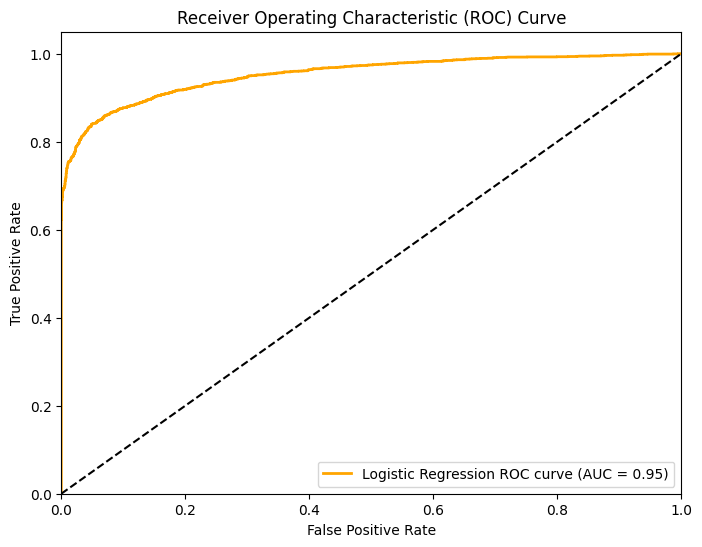

Area Under the Curve (AUC): 0.9529226674181626


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
model = LogisticRegression()

# fitting the model
model.fit(X_train_std, y_train)

# Predicting the test data
y_pred_prob = model.predict_proba(X_test_std)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculating AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plotting ROC curve with customized colors
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='Logistic Regression ROC curve (AUC = {:.2f})'.format(auc))  # Change color to a shade of orange
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Change color to a shade of gray for the dashed line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Area Under the Curve (AUC):",auc)